In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def func21(x, y):
    return 0 #np.sin(x + y)

def solution21(x, y):
    return (1 / np.sinh(np.pi)) * (np.sin(np.pi * x) * np.sinh(np.pi * (1 - y)) + np.sin(np.pi * y) * np.sinh(np.pi * (1 - x)))

In [3]:
def func27(x, y):
    return np.sin(5 * np.pi * x) * np.sin(6 * np.pi * y)

def solution27(x, y):
    return (1 / np.sinh(np.pi)) * (np.sin(np.pi * x) * np.sinh(np.pi * (1 - y))) + (1 / np.sinh(2 * np.pi)) * (np.sin(2 * np.pi * y) * np.sinh(2 * np.pi * x)) + (1 / np.sinh(3 * np.pi)) * (np.sin(3 * np.pi * x) * np.sinh(3 * np.pi * y)) + (1 / np.sinh(4 * np.pi)) * (np.sin(4 * np.pi * y) * np.sinh(4 * np.pi * (1 - x))) - (np.sin(5 * np.pi * x) * np.sin(6 * np.pi * y)) / (61 * (np.pi ** 2))

In [4]:
def func3(x, y):
    return 0

def solution3(x, y):
    return 3.0

In [5]:
def matrix_formation(n, N):
    with open(f"matrix.mtx", "w") as f:
        f.write(f"%MatrixMarket matrix coordinate real general\n")
        f.write(f"{N} {N} {N + 2 * (N - 1) + 2 * (N - n) - 2 * (n - 1)}\n")

        for i in range(1, N + 1):
            f.write(f"{i} {i} 4.0\n")

        for i in range(2, N + 1):
            if (i % n != 1):
                f.write(f"{i} {i - 1} -1.0\n")

        for i in range(2, N + 1):
            if (i % n != 1):
                f.write(f"{i - 1} {i} -1.0\n")

        for i in range(n + 1, N + 1):
            f.write(f"{i} {i - n} -1.0\n")

        for i in range(n + 1, N + 1):
            f.write(f"{i - n} {i} -1.0\n")

In [6]:
def read_solution():
    with open("solution.mtx", "r") as f:
        numerical_solution = np.array(list(map(float, f.readlines()[1:])))
        print(numerical_solution.shape)
    return numerical_solution

In [7]:
def discretization(n, curr_f, curr_solution):
    N = n * n
    h = 1 / (n + 1)
    matrix_formation(n, N)

    rhs = np.zeros(N)

    idx = 0
    for i in range(1, n + 1): #строка
        for j in range(1, n + 1): #столбец
            rhs[idx] = -(h ** 2) * curr_f(j * h, i * h)
            if (j == 1):
                rhs[idx] += curr_solution(0, i * h) #u0_c0[i]
            if (j == n):
                rhs[idx] += curr_solution(1, i * h) #u0_cn[i]
            if (i == 1):
                rhs[idx] += curr_solution(j * h, 0) #u0_r0[j] # + 
            if (i == n):
                rhs[idx] += curr_solution(j * h, 1) # u0_rn[j]
            idx += 1
    #plt.imshow(rhs.reshape(n, n))

    with open(f"rhs.mtx", "w") as f:
        f.write(f"%MatrixMarket matrix array real general\n")
        f.write(f"{N} {1}\n")
        for i in rhs:
            f.write(f"{i}\n")

    

In [8]:
def solve(n, curr_f, curr_solution):
    x = np.linspace(0, 1, n + 2)[1:-1]
    y = np.linspace(0, 1, n + 2)[1:-1]
    xv, yv = np.meshgrid(x, y)

    discretization(n, curr_f, curr_solution)
    os.system("./build/main")
    numerical_solution = read_solution().reshape(n, n)
    return numerical_solution, curr_solution(xv, yv)

# Эксперимент №2 (Задача №32 из Захарова)

In [9]:
cheb = []
frob = []

In [10]:
for i in np.logspace(1, 3, 10):
    numerical_solution, curr_solution = solve(int(i), func27, solution27)
    rel_frob = np.linalg.norm(numerical_solution.reshape(-1) - curr_solution.reshape(-1), 2) / np.linalg.norm(curr_solution.reshape(-1))
    rel_cheb = np.linalg.norm(numerical_solution.reshape(-1) - curr_solution.reshape(-1), ord = np.inf) / np.linalg.norm(curr_solution.reshape(-1), ord = np.inf)
    cheb.append(rel_cheb)
    frob.append(rel_frob)
    print("Rel_Frob: ", rel_frob)
    print("Rel_Cheb: ", rel_cheb)
    print()

Размер системы: 100
ILU(2): 3 ms
BiCGStab: 1 ms
Number of iterations: 2
Residual: 5.53277e-18
(100,)
Rel_Frob:  0.035441388755271454
Rel_Cheb:  0.05373887733121066

Размер системы: 256
ILU(2): 5 ms
BiCGStab: 1 ms
Number of iterations: 2
Residual: 8.13304e-15
(256,)
Rel_Frob:  0.014268549164590723
Rel_Cheb:  0.02031495199903539

Размер системы: 729
ILU(2): 26 ms
BiCGStab: 4 ms
Number of iterations: 2
Residual: 3.34e-11
(729,)
Rel_Frob:  0.005026368241365221
Rel_Cheb:  0.007351947847213233

Размер системы: 2116
ILU(2): 69 ms
BiCGStab: 21 ms
Number of iterations: 3
Residual: 5.589e-12
(2116,)
Rel_Frob:  0.0017229788348665578
Rel_Cheb:  0.0025878159200962343

Размер системы: 5929
ILU(2): 275 ms
BiCGStab: 114 ms
Number of iterations: 4
Residual: 1.11025e-10
(5929,)
Rel_Frob:  0.0006118246968902562
Rel_Cheb:  0.0009254405879654413

Размер системы: 16641
ILU(2): 1043 ms
BiCGStab: 648 ms
Number of iterations: 6
Residual: 6.9027e-11
(16641,)
Rel_Frob:  0.00021717697438789258
Rel_Cheb:  0.000328

In [11]:
cheb, frob 

([0.05373887733121066,
  0.02031495199903539,
  0.007351947847213233,
  0.0025878159200962343,
  0.0009254405879654413,
  0.0003285405213150535,
  0.00011809095213581025,
  4.2286437198810515e-05,
  1.5182942636470914e-05,
  5.43531366612094e-06],
 [0.035441388755271454,
  0.014268549164590723,
  0.005026368241365221,
  0.0017229788348665578,
  0.0006118246968902562,
  0.00021717697438789258,
  7.799440649284787e-05,
  2.7929507256500753e-05,
  1.0024665361173776e-05,
  3.591731842573779e-06])

Text(0.5, 1.0, 'Относительная ошибка для задачи №7.27 из задачника Захарова')

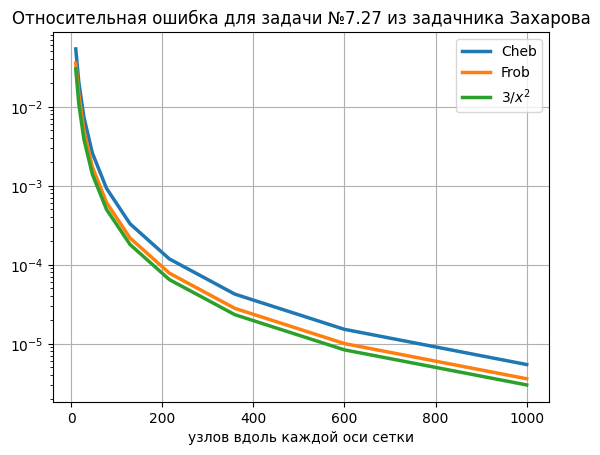

In [18]:
plt.plot(np.logspace(1, 3, 10), cheb, label = "Cheb", linewidth = 2.5)
plt.plot(np.logspace(1, 3, 10), frob, label = "Frob", linewidth = 2.5)
plt.plot(np.logspace(1, 3, 10), 3 / np.logspace(1, 3, 10) ** 2, linewidth = 2.5, label = "$3/x^2$")
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("узлов вдоль каждой оси сетки")
plt.title("Относительная ошибка для задачи №7.27 из задачника Захарова")



In [7]:
x = np.linspace(0, 1, 100 + 2)[1:-1]
y = np.linspace(0, 1, 100 + 2)[1:-1]
xv, yv = np.meshgrid(x, y)


In [8]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
        "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = x,
    y = y,
    z = solution21(xv, yv)
    #z = numerical_solution
    ))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()


In [20]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
        "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = x,
    y = y,
    #z = solution21(xv, yv)
    z = numerical_solution
    ))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()


In [19]:
cheb_21 = []
frob_21 = []

In [20]:
for i in np.logspace(1, 3, 10):
    numerical_solution, curr_solution = solve(int(i), func21, solution21)
    rel_frob = np.linalg.norm(numerical_solution.reshape(-1) - curr_solution.reshape(-1), 2) / np.linalg.norm(curr_solution.reshape(-1))
    rel_cheb = np.linalg.norm(numerical_solution.reshape(-1) - curr_solution.reshape(-1), ord = np.inf) / np.linalg.norm(curr_solution.reshape(-1), ord = np.inf)
    cheb_21.append(rel_cheb)
    frob_21.append(rel_frob)
    print("Rel_Frob: ", rel_frob)
    print("Rel_Cheb: ", rel_cheb)
    print()

Размер системы: 100
ILU(2): 2 ms
BiCGStab: 0 ms
Number of iterations: 2
Residual: 1.81936e-17
(100,)
Rel_Frob:  0.00546022701069828
Rel_Cheb:  0.005144583857276216

Размер системы: 256
ILU(2): 6 ms
BiCGStab: 2 ms
Number of iterations: 2
Residual: 4.81348e-13
(256,)
Rel_Frob:  0.002201696467743492
Rel_Cheb:  0.0020425307282529205

Размер системы: 729
ILU(2): 15 ms
BiCGStab: 3 ms
Number of iterations: 2
Residual: 6.31526e-11
(729,)
Rel_Frob:  0.0007896461075284298
Rel_Cheb:  0.0007146196887741909

Размер системы: 2116
ILU(2): 65 ms
BiCGStab: 21 ms
Number of iterations: 3
Residual: 1.07883e-11
(2116,)
Rel_Frob:  0.0002754587891938749
Rel_Cheb:  0.0002452509314993828

Размер системы: 5929
ILU(2): 286 ms
BiCGStab: 128 ms
Number of iterations: 4
Residual: 2.14945e-10
(5929,)
Rel_Frob:  9.900366013063975e-05
Rel_Cheb:  8.721455733544537e-05

Размер системы: 16641
ILU(2): 1059 ms
BiCGStab: 637 ms
Number of iterations: 6
Residual: 3.01893e-11
(16641,)
Rel_Frob:  3.542159422055008e-05
Rel_Cheb: 

# Эксперимент №1 (Задача №21 из Захарова)

In [47]:
cheb_21, frob_21 

([0.005144583857276216,
  0.0020425307282529205,
  0.0007146196887741909,
  0.0002452509314993828,
  8.721455733544537e-05,
  3.100587914530907e-05,
  1.1135258705735839e-05,
  3.979658602869556e-06,
  1.4319805404471876e-06,
  5.019718900956241e-07],
 [0.00546022701069828,
  0.002201696467743492,
  0.0007896461075284298,
  0.0002754587891938749,
  9.900366013063975e-05,
  3.542159422055008e-05,
  1.2770284475572044e-05,
  4.567794043996548e-06,
  1.649694996407983e-06,
  5.879924783402927e-07])

Text(0.5, 1.0, 'Относительная ошибка для задачи №7.21 из задачника Захарова')

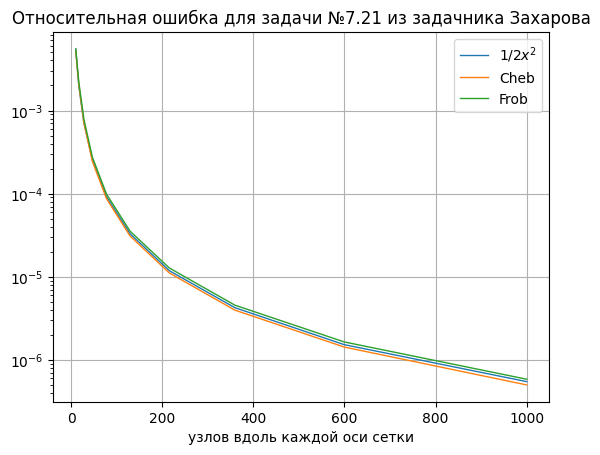

In [48]:
plt.plot(np.logspace(1, 3, 10), 0.55 / np.logspace(1, 3, 10) ** 2, linewidth = 1, label = "$1/2x^2$", alpha = 1)
plt.plot(np.logspace(1, 3, 10), cheb_21, label = "Cheb", linewidth = 1, alpha = 1)
plt.plot(np.logspace(1, 3, 10), frob_21, label = "Frob", linewidth = 1, alpha = 1)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("узлов вдоль каждой оси сетки")
plt.title("Относительная ошибка для задачи №7.21 из задачника Захарова")

In [52]:
x = np.linspace(0, 1, 1000 + 2)[1:-1]
y = np.linspace(0, 1, 1000 + 2)[1:-1]
xv, yv = np.meshgrid(x, y)


Text(0.5, 1.0, 'Ошибка на сетке')

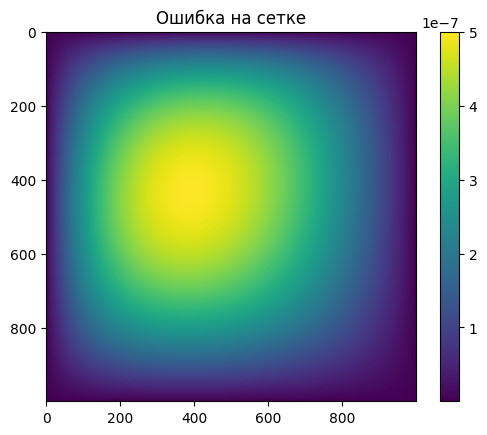

In [59]:
plt.imshow(numerical_solution - curr_solution)
plt.colorbar()
plt.title("Ошибка на сетке")